# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [321]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [322]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [323]:
df = pd.read_csv('/content/drive/MyDrive/Copy of heights.csv')

In [324]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


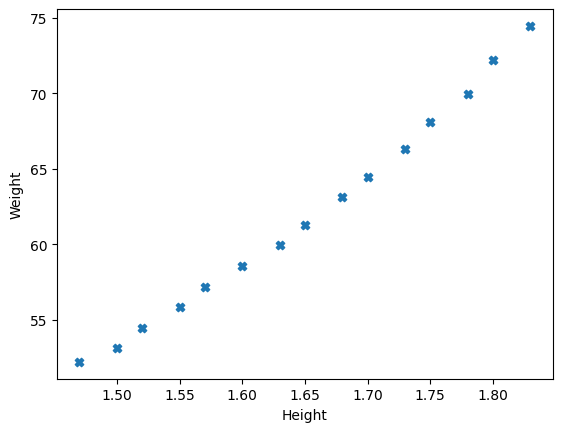

In [325]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [326]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [327]:
class LinearRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a linear regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        self.b=None
        self.w=None
        ######################
        ######################
        # You may add additional fields

    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        self.w=np.random.randn(X.shape[1])
        self.b=0

        for i in range(self.epochs):
          #print(w.shape)
          #print(X.shape)
          y_predicted=np.dot(X,self.w)+self.b
          print(self.w)
          self.update_weights(X,y,y_predicted)
        ######################



    def update_weights(self,X,y,y_predicted):
        """
        Helper function to calculate the gradients and update weights using batch gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        total_samples=len(X)
        # y=y.reshape(-1,1)

        wd=-(2/total_samples)*(X.T.dot(y-y_predicted))
        bd=-(2/total_samples)*np.sum(y-y_predicted)
        self.w=self.w-(self.lr*wd)
        self.b=self.b-(self.lr*bd)
        ######################



    def predict(self, X):
        """
        Predict values using the weights.

        Args:
            X: features

        Returns:
            The predicted value.
        """
        ######################
        y_predicted=np.dot(X,self.w)+self.b
        return y_predicted
        ######################



### Build the model and train on the dataset.

In [328]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[61.20435358]
[61.204358]
[61.20436243]
[61.20436685]
[61.20437128]
[61.2043757]
[61.20438013]
[61.20438455]
[61.20438898]
[61.2043934]
[61.20439782]
[61.20440224]
[61.20440667]
[61.20441109]
[61.20441551]
[61.20441993]
[61.20442435]
[61.20442878]
[61.2044332]
[61.20443762]
[61.20444204]
[61.20444646]
[61.20445088]
[61.20445529]
[61.20445971]
[61.20446413]
[61.20446855]
[61.20447297]
[61.20447739]
[61.2044818]
[61.20448622]
[61.20449064]
[61.20449506]
[61.20449947]
[61.20450389]
[61.2045083]
[61.20451272]
[61.20451713]
[61.20452155]
[61.20452596]
[61.20453038]
[61.20453479]
[61.20453921]
[61.20454362]
[61.20454803]
[61.20455245]
[61.20455686]
[61.20456127]
[61.20456568]
[61.20457009]
[61.20457451]
[61.20457892]
[61.20458333]
[61.20458774]
[61.20459215]
[61.20459656]
[61.20460097]
[61.20460538]
[61.20460979]
[61.2046142]
[61.2046186]
[61.20462301]
[61.20462742]
[61.20463183]
[61.20463624]
[61.20464064]
[61.20464505]
[61.20464946]
[61.20

### (5 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [329]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """
    ######################
    y_pred=np.array(y_pred)
    y_actual=np.array(y_actual)
    loss=np.mean(np.square(y_actual-y_pred))
    return loss
    ######################



### Make predictions using the model and evaluate it.

In [330]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.4994


### Plot the predicted and the actual values.

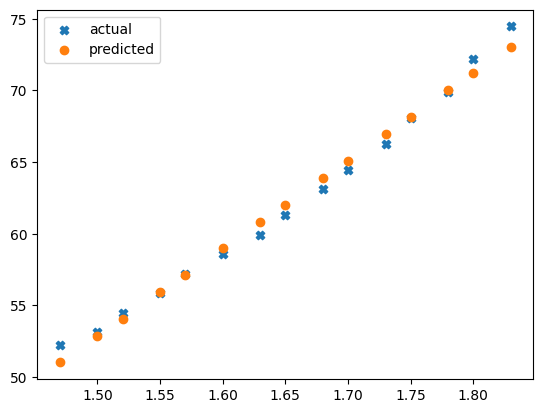

In [331]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [332]:
df = pd.read_csv('/content/drive/MyDrive/Copy of advertise.csv')

In [333]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [334]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### (5 points) Normalize the features in your dataset.

Gradient descent-based models can be sensitive to different scales of the features/independent variables. Hence, it is important to normalize them. You may use the functions, `dataset_minmax`, `normalize_dataset`, and `unnormalize_dataset`, provided in the code block below to perform [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling) on the features.

In [335]:
def dataset_minmax(dataset):
    """
    Finds the min and max values for each column.
    """
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to the range 0-1.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return dataset

def unnormalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to their original values.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
    return dataset

In [336]:
######################
minmax = dataset_minmax(X)
norml_data = normalize_dataset(X,minmax)
######################
#print(X_norm)
#print(y_norm)


### Split the data into train and test set.

In [337]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [338]:
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [339]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

### Build the model and train on the dataset.

In [340]:
model = LinearRegression(0.01, 10000)
model.train(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[16.10074618  4.96085203  0.60725424]
[16.10077043  4.96088238  0.60719768]
[16.10079466  4.96091271  0.60714115]
[16.10081885  4.96094301  0.60708465]
[16.10084301  4.96097329  0.60702818]
[16.10086715  4.96100354  0.60697173]
[16.10089125  4.96103377  0.60691531]
[16.10091532  4.96106398  0.60685892]
[16.10093936  4.96109417  0.60680256]
[16.10096337  4.96112433  0.60674623]
[16.10098735  4.96115447  0.60668992]
[16.1010113   4.96118459  0.60663365]
[16.10103522  4.96121468  0.6065774 ]
[16.10105911  4.96124475  0.60652118]
[16.10108297  4.9612748   0.60646499]
[16.1011068   4.96130482  0.60640882]
[16.10113059  4.96133482  0.60635268]
[16.10115436  4.9613648   0.60629658]
[16.1011781   4.96139475  0.6062405 ]
[16.10120181  4.96142469  0.60618444]
[16.10122548  4.9614546   0.60612842]
[16.10124913  4.96148448  0.60607242]
[16.10127275  4.96151434  0.60601645]
[16.10129634  4.96154418  0.60596051]
[16.10131989  4.961574    0.6059046 ]

### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [341]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: 2.6761
Test MSE: 2.9093


# Using Closed Form Solution(75)


* For both the above 2 models you need to try out the closed form solutions
* The more efforts you put in, the more marks you get.
* It is open ended

In [342]:

ones_column = np.ones((X_train.shape[0], 1))
#print(X_train)
X_train=np.hstack((ones_column, X_train))
#print(X_train)
X_transpose=(X_train).T
y_train=y_train.reshape(-1,1)
closed_form_solution=np.dot(X_transpose,X_train)
#print(closed_form_solution)
closed_form_solution = np.linalg.inv(closed_form_solution)
closed_form_solution=np.dot(closed_form_solution,X_transpose)
closed_form_solution=np.dot(closed_form_solution,y_train)
print(closed_form_solution)

[[ 4.75358389]
 [16.11839139]
 [ 5.00688997]
 [ 0.49307674]]


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [343]:
df = pd.read_csv('/content/drive/MyDrive/Copy of heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [344]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [345]:
class LogisticRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a logistic regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        ######################
        self.b=None
        self.w=None
        ######################
        # You may add additional fields
    # Function for model training
    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        self.w=np.random.randn(X.shape[1])
        self.b=0
        #print(w.shape)
        #print(X.shape)
        for i in range(self.epochs):
          #print(w.shape)
          #print(X.shape)
          y_predicted=np.dot(X,self.w)+self.b
          for i in range(len(y_predicted)):
            if (y_predicted[i]>=60):
              y_predicted[i]=1
            else:
              y_predicted[i]=0
          print(self.w)
          self.update_weights(X,y,y_predicted)
        #####################

    def update_weights(self, X, y,y_predicted):
        """
        Helper function to calculate the gradients and update weights in gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        total_samples=len(X)
        # y=y.reshape(-1,1)

        wd=-(2/total_samples)*(X.T.dot(y-y_predicted))
        bd=-(2/total_samples)*np.sum(y-y_predicted)
        self.w=self.w-(self.lr*wd)
        self.b=self.b-(self.lr*bd)
        ######################



    def predict(self, X):
        """
        Predict probabilities using the weights.

        Args:
            X: features

        Returns:
            The predicted probability.
        """
        ######################
        y_predicted=np.dot(X,self.w)+self.b
        for i in range(len(y_predicted)):
          if (y_predicted[i]>=60):
            y_predicted[i]=1
          else:
            y_predicted[i]=0
        return y_predicted
        ######################



### Build the model and train on the dataset.

In [346]:
model = LogisticRegression(0.1, 100000)
model.train(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.96088652]
[26.9608865

### (5 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [347]:
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The accuracy.
    """
    ######################
    y_pred=y_pred.reshape(-1,)
    y_actual=y_actual.reshape(-1,)
    #print(y_pred)
    #print(y_actual)
    correct=0
    for i in range(len(y_pred)):
      if (y_pred[i]==y_actual[i]):
        correct=correct+1
    return correct/len(y_pred)



### Make predictions using the model and evaluate it.

In [348]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 1.0


### Plot the predicted and the actual values.

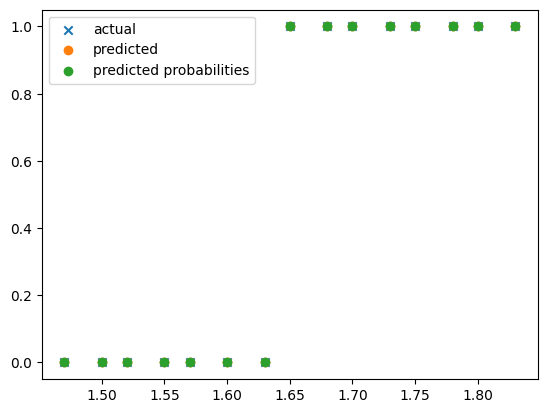

In [349]:
import matplotlib.pyplot as plt
X_train=X_train.reshape(-1,)
plt.scatter(X_train, y_train, marker='x', label='actual')#all three symbols are stacked on top of each other and there for only one is visible
plt.scatter(X_train, y_pred, marker='o', label='predicted')#all three symbols are stacked on top of each other and there for only one is visible
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')#all three symbols are stacked on top of each other and there for only one is visible
plt.legend()
plt.show()

# ** Use the Newton Raphson Method for the same** (75 marks)


In [350]:
def logistic_regression_newton_raphson(X, y, num_iterations=100, tol=1e-6):

    n_samples, n_features = X.shape
    weights = np.zeros(n_features)

    for i in range(num_iterations):
        y_pred = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (y - y_pred))
        print((X.T).shape)
        hessian = np.dot(X,(X * np.outer(y_pred, (1 - y_pred))))
        weights += np.linalg.inv(hessian).dot(gradient)

    return weights

In [351]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
X_train = np.column_stack((np.ones(len(X_train)), X_train))
y_train_binary = (y_train >= 60).astype(int)

In [352]:
weights = logistic_regression_newton_raphson(X_train, y_train_binary)
X_test = np.column_stack((np.ones(len(X_test)), X_test))
y_pred_probs = 1 / (1 + np.exp(-np.dot(X_test, weights)))
y_pred_binary = (y_pred_probs >= 0.5).astype(int)

(2, 15)


ValueError: operands could not be broadcast together with shapes (15,2) (15,15) 

# K Means Clustering(100 marks)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the two Gaussians
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])



In [ ]:
n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples2[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Two Gaussians')
plt.legend()
plt.grid(True)
plt.show()

The above is the dataset generated from 3 gaussians, and a visualizations for the same, You need to assume that you have the data and then you use k means for the same your output should be similar to what is shown above

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])

n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples3[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()